<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/lab/Lab_10_23_23_Gaussian_Process_Regression_WFF_23Oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(1415)

# Generate Synthetic Dataset

In [6]:
a = [1,2,3]
b = [-1, -2 ,-3]
aa , bb = np.meshgrid(a,b)
#useful grid of two useful arrays
#index through every single combination in two arrays

In [9]:
aa , bb

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[-1, -1, -1],
        [-2, -2, -2],
        [-3, -3, -3]]))

In [10]:
aa + bb , aa*bb, aa - bb, np.sin(aa) * np.cos(bb)

(array([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]]),
 array([[-1, -2, -3],
        [-2, -4, -6],
        [-3, -6, -9]]),
 array([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]]),
 array([[ 0.45464871,  0.4912955 ,  0.07624747],
        [-0.35017549, -0.37840125, -0.05872664],
        [-0.83304996, -0.90019763, -0.13970775]]))

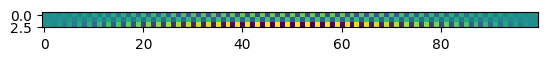

In [12]:
a = np.linspace(0, 10 * np.pi, 100)
xx, yy = np.meshgrid(a,b)
f_xy = np.sin(xx) * np.cos(yy)
plt.imshow(f_xy)

In [4]:
np.meshgrid?


In [14]:
def gen_synthetic_data(nSynth, theta):

    # Generate synthetic sample points between -1 and 1.
    #Theta is the paramter of our model
    X  = rng.uniform(low=-1, high=1, size=nSynth)
    #draws sample values from -1 to 1 from a uniform distribution
    # X = np.linspace(-1, 1, num=nSynth)

    # Generate stochastic Gaussian noise for each sample.
    E = np.abs(rng.normal(loc=0, scale=0.25, size=nSynth))
    #mean =0
    # E *= 0.00001

    # Use Kernel function to make covariance matrix.
    K = rbf_kernel(X, X, theta)

    # A diagnoal matrix containing the stochastic Gaussian noise.
    W = white_noise_kernel(E)

    # C + W is the covariance matrix of the posterior distribution. Sample from it at mean 0.
    Y = rng.multivariate_normal(np.zeros(nSynth), K + W) # K+W is the covariance matrix

    return X, Y, E, K, W


def rbf_kernel(X1, X2, theta):
    uu, vv = np.meshgrid(X1, X2)
    return np.exp(-(vv - uu)**2 / (2 * theta**2))
    # meshgrid is going to give same values alongthe columns


def white_noise_kernel(E):
    return np.diag(E**2)

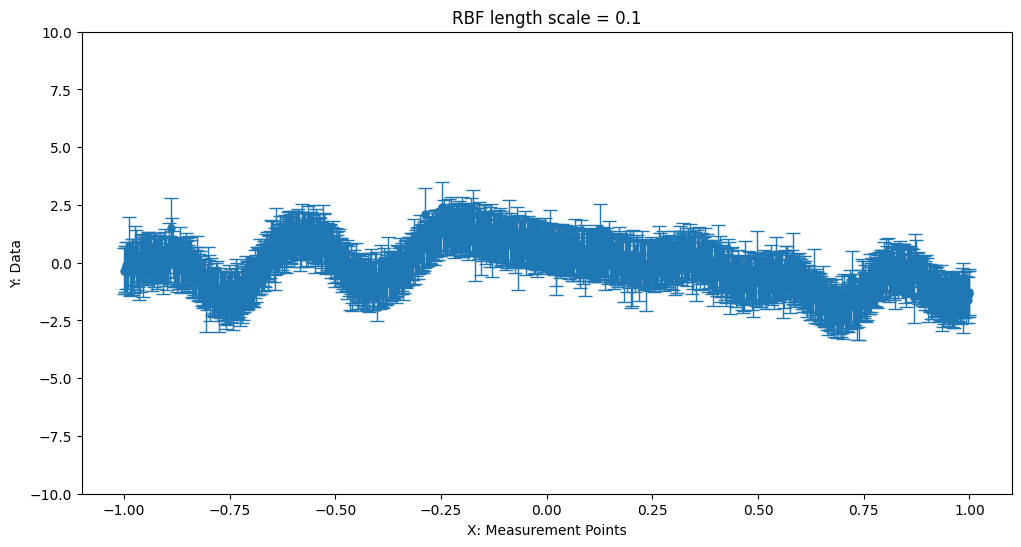

In [28]:
theta = 0.1
nSynth = 1000
X, Y, E, K_true, W = gen_synthetic_data(nSynth, theta)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"RBF length scale = {theta}")

ax.errorbar(
    X, Y,
    yerr=np.sqrt(np.diag(K_true+W)),
    ls="", marker="o", ms=5,
    elinewidth=1, capsize=5,
    )

ax.set_ylim(-10, 10)
ax.set_xlabel("X: Measurement Points")
ax.set_ylabel("Y: Data")
fig.show()

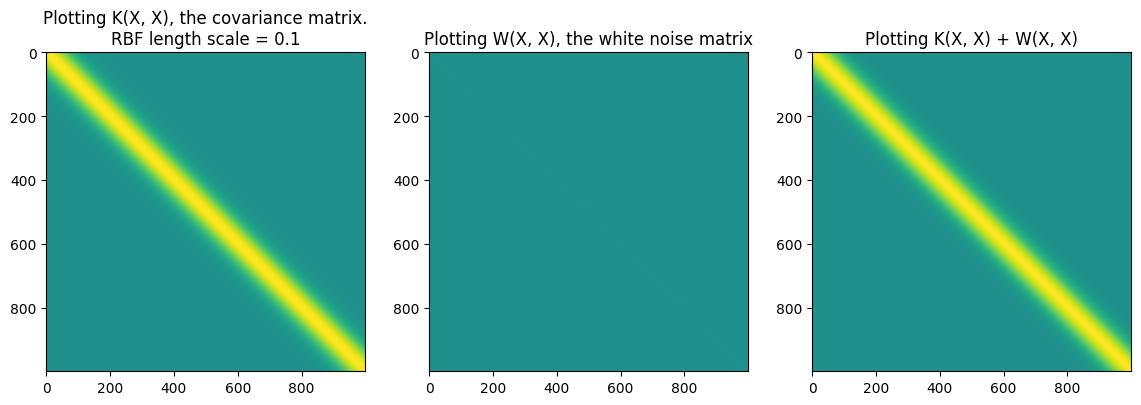

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].set_title(f"Plotting K(X, X), the covariance matrix.\nRBF length scale = {theta}")
ax[0].imshow(K_true, vmin=-1, vmax=1)

ax[1].set_title("Plotting W(X, X), the white noise matrix")
ax[1].imshow(W, vmin=-1, vmax=1)

ax[2].set_title("Plotting K(X, X) + W(X, X)")
ax[2].imshow(K_true + W, vmin=-1, vmax=1)

fig.show()

white noise matrix has no off diagonal values, it's completely diagonal, White noise has barely any affect on the sum of both covariance matrix, Every yellow point indicates strong covariance between the two data points.

In [19]:
def gen_synthetic_data(nSynth, theta):

    # Generate synthetic sample points between -1 and 1.
    #Theta is the paramter of our model
    #X  = rng.uniform(low=-1, high=1, size=nSynth)
    #draws sample values from -1 to 1 from a uniform distribution
    X = np.linspace(-1, 1, num=nSynth)

    # Generate stochastic Gaussian noise for each sample.
    E = np.abs(rng.normal(loc=0, scale=0.25, size=nSynth))
    #mean =0
    # E *= 0.00001

    # Use Kernel function to make covariance matrix.
    K = rbf_kernel(X, X, theta)

    # A diagnoal matrix containing the stochastic Gaussian noise.
    W = white_noise_kernel(E)

    # C + W is the covariance matrix of the posterior distribution. Sample from it at mean 0.
    Y = rng.multivariate_normal(np.zeros(nSynth), K + W) # K+W is the covariance matrix

    return X, Y, E, K, W


def rbf_kernel(X1, X2, theta):
    uu, vv = np.meshgrid(X1, X2)
    return np.exp(-(vv - uu)**2 / (2 * theta**2))
    # meshgrid is going to give same values alongthe columns


def white_noise_kernel(E):
    return np.diag(E**2)

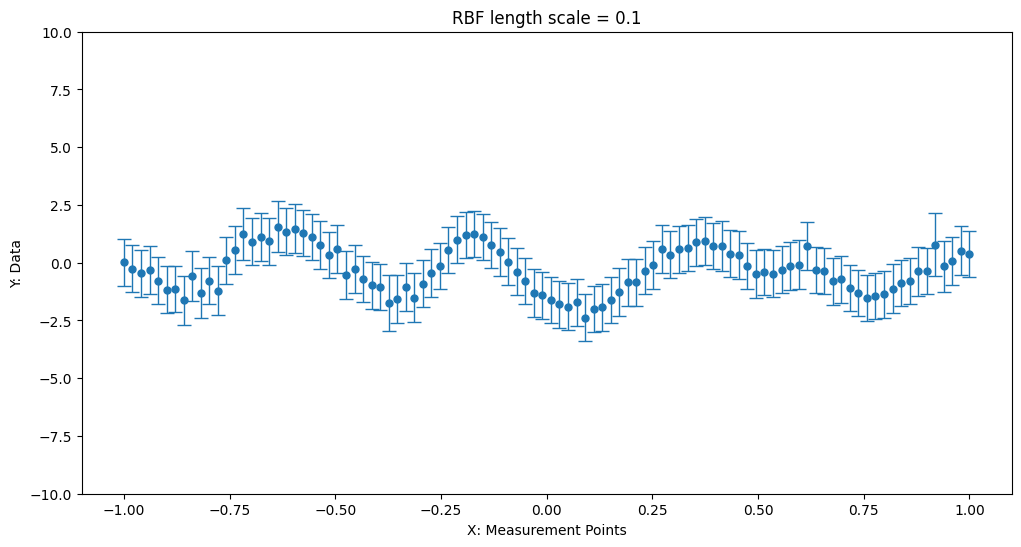

In [20]:
theta = 0.1
nSynth = 100
X, Y, E, K_true, W = gen_synthetic_data(nSynth, theta)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"RBF length scale = {theta}")

ax.errorbar(
    X, Y,
    yerr=np.sqrt(np.diag(K_true+W)),
    ls="", marker="o", ms=5,
    elinewidth=1, capsize=5,
    )

ax.set_ylim(-10, 10)
ax.set_xlabel("X: Measurement Points")
ax.set_ylabel("Y: Data")
fig.show()

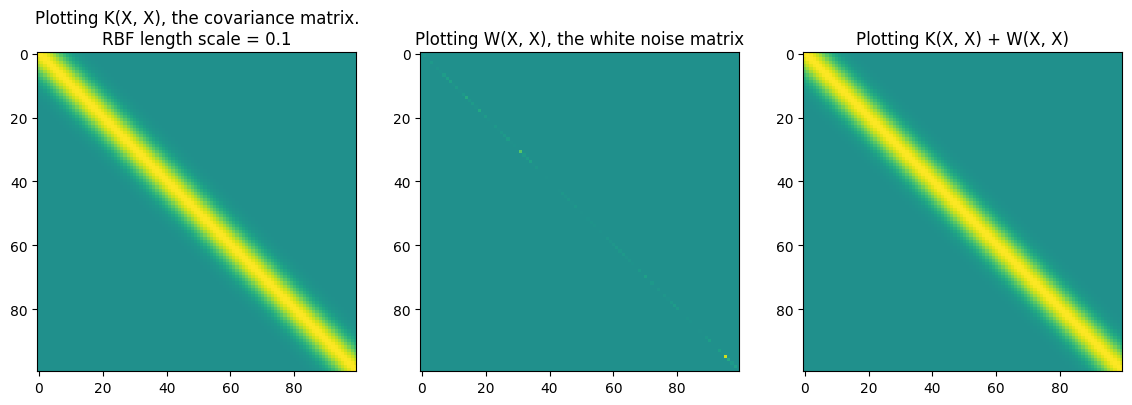

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].set_title(f"Plotting K(X, X), the covariance matrix.\nRBF length scale = {theta}")
ax[0].imshow(K_true, vmin=-1, vmax=1)

ax[1].set_title("Plotting W(X, X), the white noise matrix")
ax[1].imshow(W, vmin=-1, vmax=1)

ax[2].set_title("Plotting K(X, X) + W(X, X)")
ax[2].imshow(K_true + W, vmin=-1, vmax=1)

fig.show()

Point along the diagonal shows the variance of one dat apoint with itself, the first plot shows the covariance with one point and it's nighbors upto 10 ppoints maybe is very high, however if you move far away we dont really see any covariance. it is because X is ordered from -1 to 1.

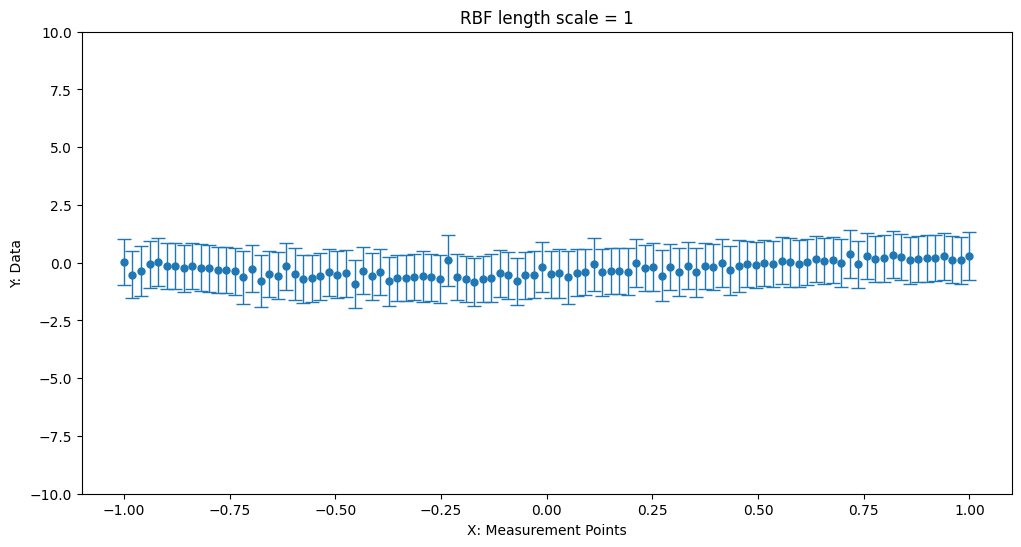

In [22]:
theta = 1 # characteristic length scale
nSynth = 100
X, Y, E, K_true, W = gen_synthetic_data(nSynth, theta)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"RBF length scale = {theta}")

ax.errorbar(
    X, Y,
    yerr=np.sqrt(np.diag(K_true+W)),
    ls="", marker="o", ms=5,
    elinewidth=1, capsize=5,
    )

ax.set_ylim(-10, 10)
ax.set_xlabel("X: Measurement Points")
ax.set_ylabel("Y: Data")
fig.show()

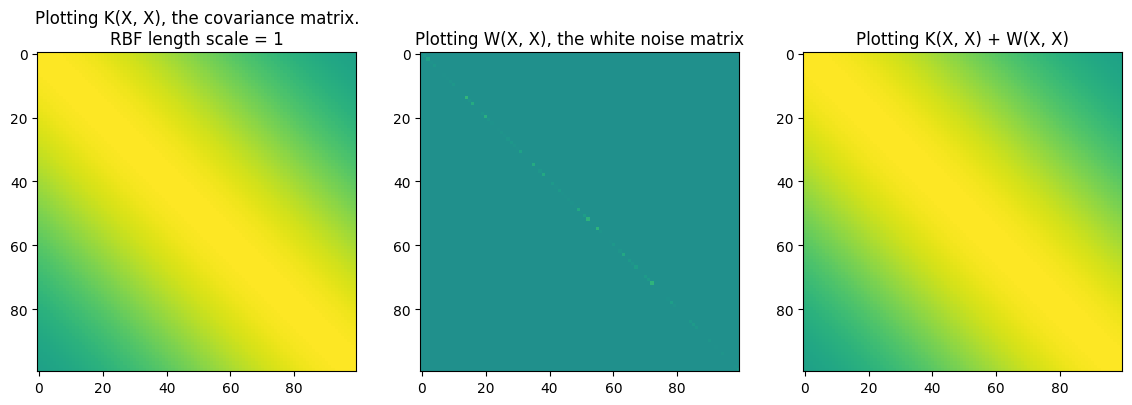

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].set_title(f"Plotting K(X, X), the covariance matrix.\nRBF length scale = {theta}")
ax[0].imshow(K_true, vmin=-1, vmax=1)

ax[1].set_title("Plotting W(X, X), the white noise matrix")
ax[1].imshow(W, vmin=-1, vmax=1)

ax[2].set_title("Plotting K(X, X) + W(X, X)")
ax[2].imshow(K_true + W, vmin=-1, vmax=1)

fig.show()

The points now, ten times dar away are strongly correlated.

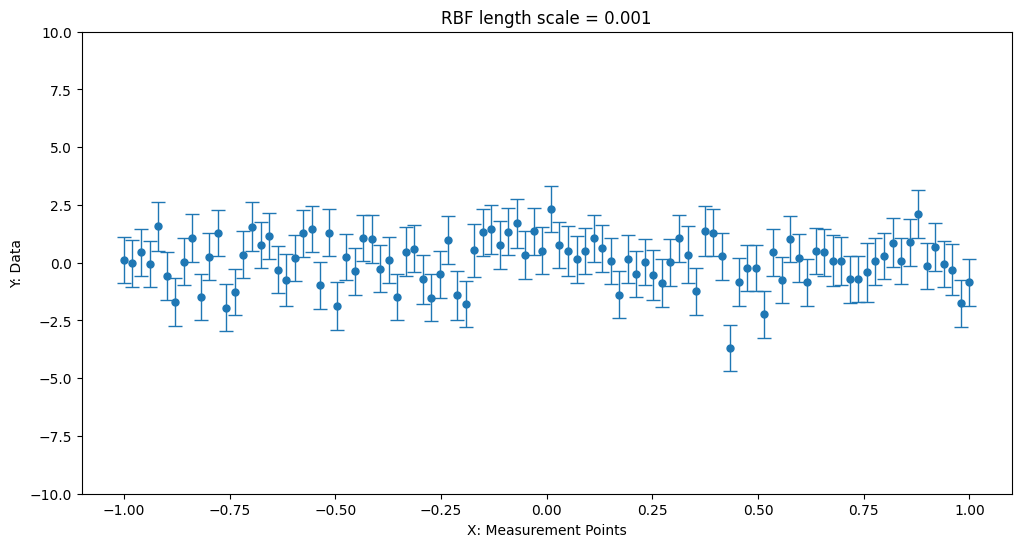

In [24]:
theta = 0.001 # characteristic length scale took it really small
#kernel is the standard between the relation between real data
nSynth = 100
X, Y, E, K_true, W = gen_synthetic_data(nSynth, theta)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"RBF length scale = {theta}")

ax.errorbar(
    X, Y,
    yerr=np.sqrt(np.diag(K_true+W)),
    ls="", marker="o", ms=5,
    elinewidth=1, capsize=5,
    )

ax.set_ylim(-10, 10)
ax.set_xlabel("X: Measurement Points")
ax.set_ylabel("Y: Data")
fig.show()

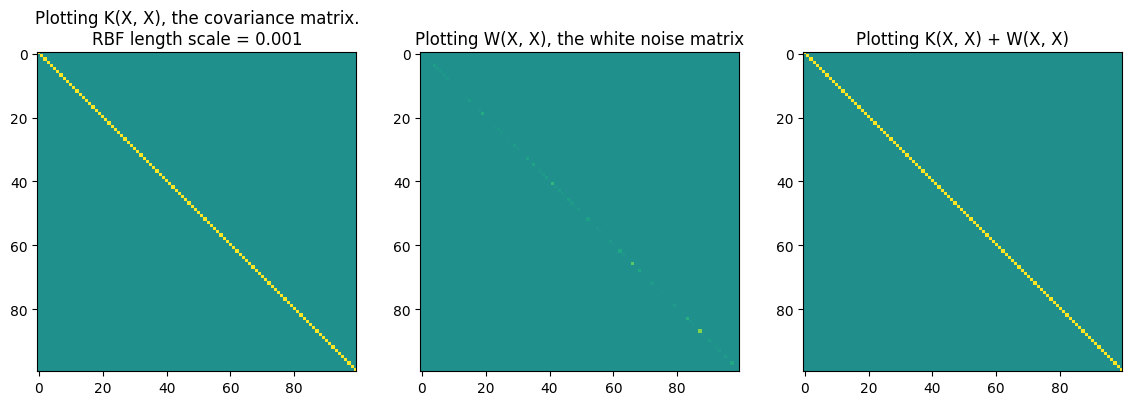

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].set_title(f"Plotting K(X, X), the covariance matrix.\nRBF length scale = {theta}")
ax[0].imshow(K_true, vmin=-1, vmax=1)

ax[1].set_title("Plotting W(X, X), the white noise matrix")
ax[1].imshow(W, vmin=-1, vmax=1)

ax[2].set_title("Plotting K(X, X) + W(X, X)")
ax[2].imshow(K_true + W, vmin=-1, vmax=1)

fig.show()

In [26]:
theta = 0.1

# Learn about Gaussian process fitting

In [30]:
Xtrn, Xtst, Ytrn, Ytst, Etrn, Etst = train_test_split(X, Y, E, train_size=0.05, random_state=rng, shuffle=True)
# Y = measurd data, E = noise
print(Xtrn.shape, Ytrn.shape, Etrn.shape)
print(Xtst.shape, Ytst.shape, Etst.shape)

num_trn = Xtrn.shape[0]
num_tst = Xtst.shape[0]

(50,) (50,) (50,)
(950,) (950,) (950,)


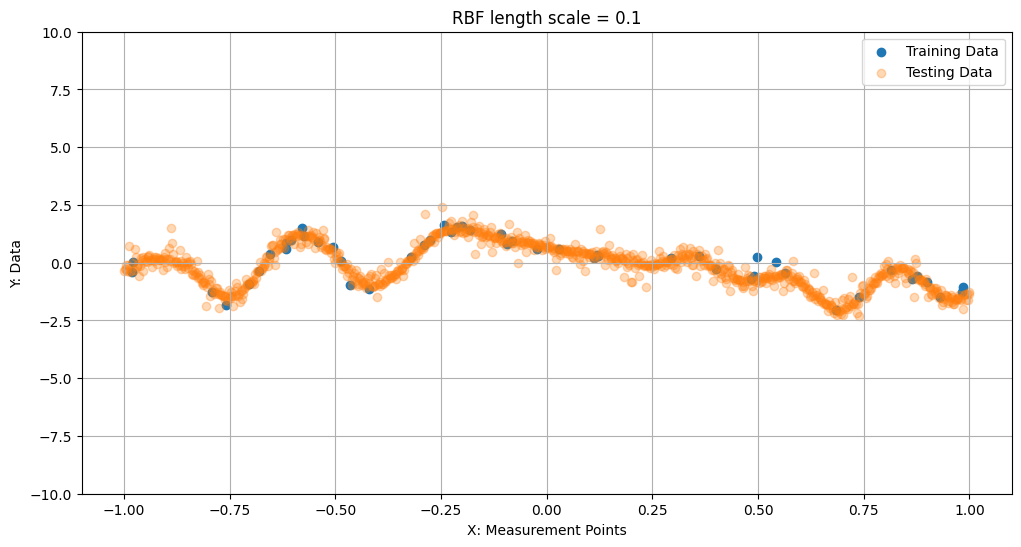

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"RBF length scale = {theta}")

ax.scatter(Xtrn, Ytrn, label="Training Data")
ax.scatter(Xtst, Ytst, label="Testing Data", alpha=0.30)

ax.set_ylim(-10, 10)
ax.set_xlabel("X: Measurement Points")
ax.set_ylabel("Y: Data")
ax.legend()
ax.grid()
fig.show()

In [33]:
def fit_GP(Xtrn, Etrn, Ytrn, num_tst, theta):
    K = rbf_kernel(Xtrn, Xtrn, theta)
    W = white_noise_kernel(Etrn)

    L = np.linalg.cholesky(K + W)

    alpha = np.linalg.solve(L.T, np.linalg.solve(L, Ytrn))
    nLML = -((-1/2) * np.dot(Ytrn, alpha) - np.sum(np.log(np.diag(L))) - (num_tst / 2) * np.log(2 * np.pi))
    #negative log marginal likelihood --> how good the model is acts as chi square
    return K, W, L, alpha, nLML


def predict_GP(Xtrn, Xprd, K, W, L, alpha, nLML):
    Ks = rbf_kernel(Xprd, Xtrn, theta)
    fbar_s = np.dot(Ks.T, alpha)

    Kss = rbf_kernel(Xprd, Xprd, theta)
    v = np.linalg.solve(L, Ks)
    V_s = Kss - np.dot(v.T, v)
    sigma = np.sqrt(np.abs(np.diag(V_s)))

    return Ks, fbar_s, Kss, v, V_s, sigma

In [34]:
theta_guess = 0.1

# Fit model
Ktrn, Wtrn, L, alpha, nLML = fit_GP(Xtrn, Etrn, Ytrn, num_tst, theta_guess)
print(Ktrn.shape, Wtrn.shape, L.shape, alpha.shape, nLML)

(50, 50) (50, 50) (50, 50) (50,) 850.5555264925865


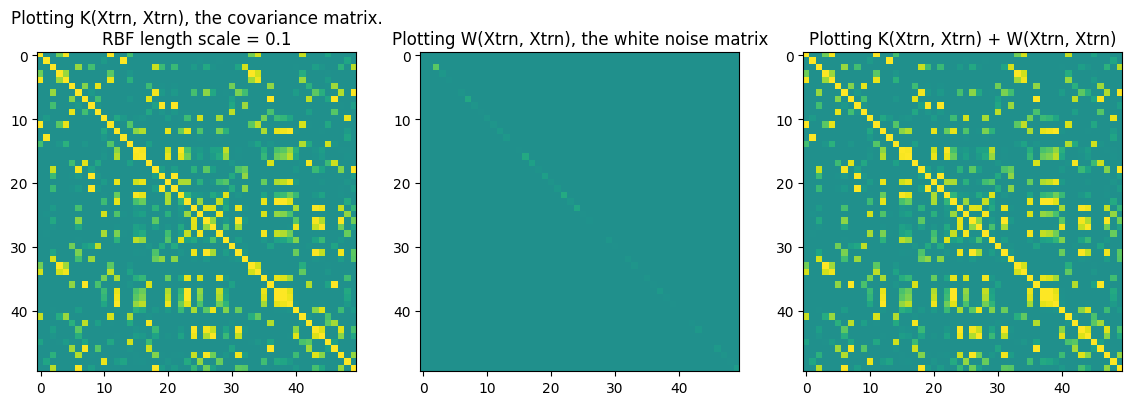

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].set_title(f"Plotting K(Xtrn, Xtrn), the covariance matrix.\nRBF length scale = {theta_guess}")
ax[0].imshow(Ktrn,
             vmin=-1, vmax=1
             )

ax[1].set_title("Plotting W(Xtrn, Xtrn), the white noise matrix")
ax[1].imshow(Wtrn,
             vmin=-1, vmax=1
             )

ax[2].set_title("Plotting K(Xtrn, Xtrn) + W(Xtrn, Xtrn)")
ax[2].imshow(Ktrn + Wtrn,
             vmin=-1, vmax=1
             )

fig.show()

covariance matrix evaluated on train data

In [36]:
Ks, fbar_s, Kss, v, V_s, sigma = predict_GP(Xtrn, Xtst, Ktrn, Wtrn, L, alpha, nLML)
Ks.shape, fbar_s.shape, Kss.shape, v.shape, V_s.shape, sigma.shape

((50, 950), (950,), (950, 950), (50, 950), (950, 950), (950,))

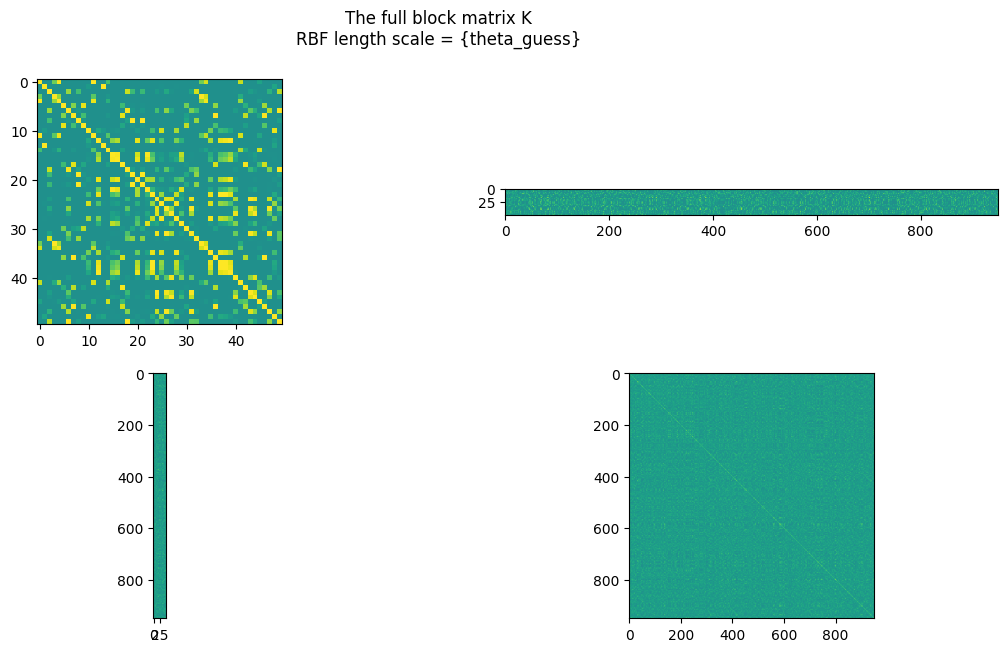

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

# ax[0, 0].set_title(f"Plotting K(Xtrn, Xtrn), the covariance matrix.\nRBF length scale = {theta_guess}")
ax[0, 0].imshow(Ktrn, vmin=-1, vmax=1)

# ax[0, 1].set_title(f"Plotting K(Xtrn, Xtrn), the covariance matrix.\nRBF length scale = {theta_guess}")
ax[0, 1].imshow(Ks, vmin=-1, vmax=1)

# ax[1, 0].set_title(f"Plotting K(Xtrn, Xtrn), the covariance matrix.\nRBF length scale = {theta_guess}")
ax[1, 0].imshow(Ks.T, vmin=-1, vmax=1)

# ax[1, 1].set_title(f"Plotting K(Xtrn, Xtrn), the covariance matrix.\nRBF length scale = {theta_guess}")
ax[1, 1].imshow(Kss, vmin=-1, vmax=1)

fig.suptitle("The full block matrix K\nRBF length scale = {theta_guess}")

fig.show()

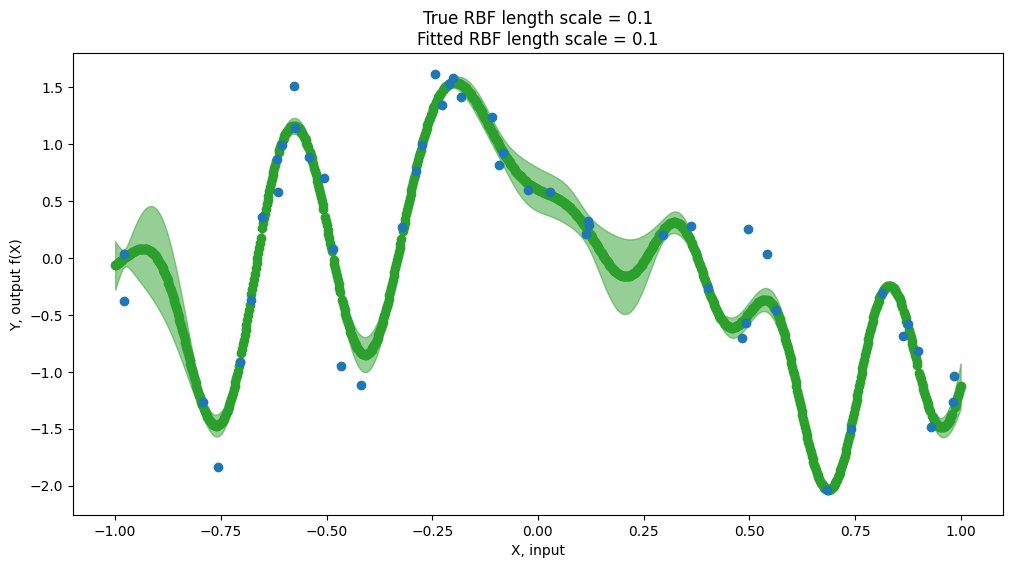

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"True RBF length scale = {theta}\nFitted RBF length scale = {theta_guess}")

# ax.scatter(Xtrn, Ytrn, label="Training Data", c="tab:blue")
# ax.scatter(Xtst, Ytst, label="Testing Data", c="tab:orange")

ax.scatter(Xtst, fbar_s, label="Testing Data", c="tab:green")
ind = np.argsort(Xtst)
ax.fill_between(Xtst[ind], fbar_s[ind] - sigma[ind], fbar_s[ind] + sigma[ind],
                alpha=0.5, color="tab:green")

ax.scatter(Xtrn, Ytrn, label="Training Data", c="tab:blue")

# ax.errorbar(
#     Xtst, fbar_s, label="Prediction", c="tab:green",
#     yerr=sigma,
#     ls="", marker="o", ms=5,
#     elinewidth=1, capsize=5,
#     )





# ax.set_ylim(-10, 10)
ax.set_xlabel("X, input")
ax.set_ylabel("Y, output f(X)")
fig.show()

blue = training data
green = predicted data
(reduce the noise by uncommenting E= 0.0001

Gaussian processes are really good with missing data, when dealing with astronomical data there might be chances of irregular data because of missing data. For analsyis apply gaussian processes, and then do you know the covariance matrix ? and any known kernel function? and what parameters do. you give to that function.
change the theta as seems like this model is very sensitive to theta values.

# Optimizing the Gaussian process regressor

In [42]:
# fit the model using optimizer method, or we can use nlML to check the score
def objective_function(theta, Xtrn , Etrn, Ytrn, num_tst):
  K = rbf_kernel(Xtrn, Xtrn, theta)
  W = white_noise_kernel(Etrn)

  L = np.linalg.cholesky(K + W)

  alpha = np.linalg.solve(L.T, np.linalg.solve(L, Ytrn))
  nLML = -((-1/2) * np.dot(Ytrn, alpha) - np.sum(np.log(np.diag(L))) - (num_tst / 2) * np.log(2 * np.pi))
    #negative log marginal likelihood --> how good the model is acts as chi square


  return nLML

In [43]:
from scipy.optimize import minimize

In [45]:
x0 = 2
res = minimize(objective_function, x0, args = (Xtrn, Etrn, Ytrn, num_tst))

In [46]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 849.6597855091813
        x: [ 8.853e-02]
      nit: 5
      jac: [-7.629e-06]
 hess_inv: [[ 7.474e-05]]
     nfev: 18
     njev: 9

theta value is give as 8.8e-2 and the score is 849.65, whereas the true value is 0.1.